In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import urllib.request
import tarfile
from tensorflow.keras import layers,datasets,models 

In [3]:
#下载
url='https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz'
filepath='c:/users/yanhe/.keras/datasets/cifar-100-python.tar.gz'
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)
else:
    print('data file already exist')
#解压
if not os.path.exists("c:/users/yanhe/.keras/datasets/cifar-100-batches-py"):
    tfile=tarfile.open("c:/users/yanhe/.keras/datasets/cifar-100-python.tar.gz",'r:gz')
    result=tfile.extractall('c:/users/yanhe/.keras/datasets')
    print('Extracted to c:/users/yanhe/.keras/datasets/cifar-100-batches-py')
else:
    print('Directory already exists.')


data file already exist
Extracted to c:/users/yanhe/.keras/datasets/cifar-100-batches-py


In [4]:
#载入数据
(train_x,train_y),(test_x,test_y)=datasets.cifar100.load_data()


In [5]:
#显示数据集信息
print('training data shape:',train_x.shape)
print('training labels shape:',train_y.shape)
print('test data shape:',test_x.shape)
print('test label shape:',test_y.shape)

training data shape: (50000, 32, 32, 3)
training labels shape: (50000, 1)
test data shape: (10000, 32, 32, 3)
test label shape: (10000, 1)


In [ ]:
#查看单项image和label
#查看Xtrain第7张image
plt.imshow(train_x[6])

In [ ]:
#查看label
#对应类别信息可查看：https://www.cs.toronto.edu/~kriz/cifar.html
train_y[6]


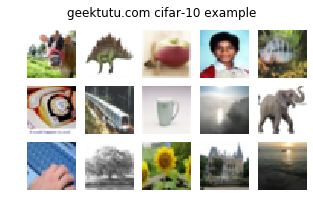

In [6]:
plt.figure(figsize=(5,3))
plt.subplots_adjust(hspace=0.1)
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(train_x[i])
    plt.axis('off')
_ = plt.suptitle("geektutu.com cifar-10 example")

In [ ]:
#数据预处理
#查看图像信息，显示第一个图像的第一个像素点
train_x[0][0][0]

In [ ]:
#将图像进行数字标准化
train_x,test_x=train_x/255.0,test_x/255.0
#查看预处理后的图像数据信息
train_x[0][0][0]

In [ ]:
#查看标签数据
train_y[:10]

In [ ]:
train_y.shape

In [10]:
covn_base=tf.keras.applications.vgg16.VGG16(weights='imagenet',
                                               include_top=False,
                                               input_shape=(32,32,3),
                                               pooling='max')
covn_base.trainable=False

In [11]:
covn_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [12]:
model=tf.keras.Sequential()
model.add(covn_base)
model.add(layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6500      
Total params: 14,795,108
Trainable params: 80,420
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history=model.fit(train_x,train_y,epochs=5)

Epoch 1/5
50000/50000 [==============================] - 238s 5ms/sample - loss: 4.1646 - acc: 0.1061
Epoch 2/5
50000/50000 [==============================] - 253s 5ms/sample - loss: 3.1632 - acc: 0.2214s - loss: 3.1673 - acc: 0.2 - ETA: 6s - lo - ETA: 2s - loss: 3.1659 - acc: 0 - ETA: 1s - loss: 3.1645 - 
Epoch 3/5
50000/50000 [==============================] - 299s 6ms/sample - loss: 2.8986 - acc: 0.2717
Epoch 4/5
50000/50000 [==============================] - 309s 6ms/sample - loss: 2.7596 - acc: 0.3012s - loss - ETA: 0s - loss: 2.7598 - acc: 0.30
Epoch 5/5
50000/50000 [==============================] - 299s 6ms/sample - loss: 2.6554 - acc: 0.3219


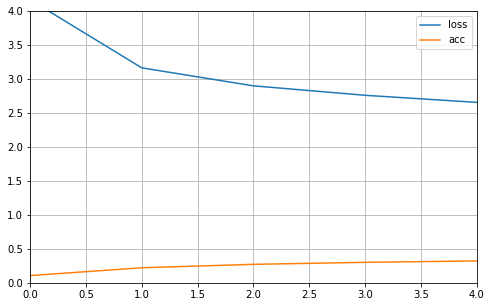

In [17]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,4)
    plt.show()
    
plot_learning_curves(history)

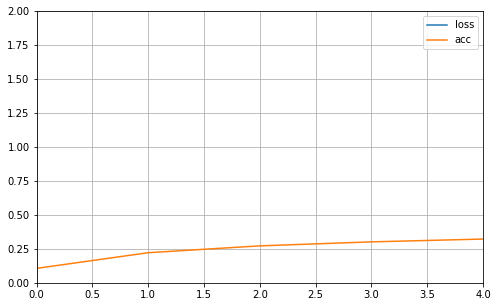

In [15]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,2)
    plt.show()
    
plot_learning_curves(history)

In [16]:
model.evaluate(test_x,test_y)

10000/10000 [==============================] - 60s 6ms/sample - loss: 2.9124 - acc: 0.28984s - loss


[2.9123995601654054, 0.2898]